# Data Cleaning & Feature Extraction

In this notebook, load the different data sources explored earlier and clean them for our approaches. We will then create a very basic predicition system to check for 

In [1]:
import pandas as pd
import numpy as np
import sys, os
import sys
sys.path.insert(1, '..')
import recommender as rcmd
%matplotlib inline

Next we will load a set of relevant data sources

In [2]:
nf = rcmd.news.FPNewsFeed('https://www.ft.com/business-education?format=rss', col_map={'link': 'article_link', 'summary': 'summary', 'title': 'headline', 'published': 'date'}, filter=True)
news_meta, df_news = nf.news()
sm = rcmd.stocks.FMPStatements()
tk = rcmd.stocks.AlphaVantageTicker()
df_stocks = rcmd.contrib.fmp_api.profile.list_symbols()

In [30]:
df_stocks['symbol'].values

array(['SPY', 'CMCSA', 'KMI', ..., 'ZWZZT', 'ZXZZT', 'ZYME'], dtype=object)

## Data Extraction Pipeline

Our goal will be to create a pipeline that can extract data for a specific stock we select from `df_stocks`. This includes the last balance-sheet statements as well as historic stock prices. We should also search for historic news that we can use for the training process.

In [ ]:
def find_stock(name, stocks):
    return stocks[stocks['name'].str.contains(name, case=False)]

In [3]:
# some stock selection functions (this gathers all available data and might take a while...)
#tdf = sm.merge_records(df_stocks['symbol'].values)
df = pd.read_csv('../data/statements.csv')

..\recommender\stocks\Statements.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dfs, axis=0)


In [4]:
df.to_csv('../data/statements.csv')

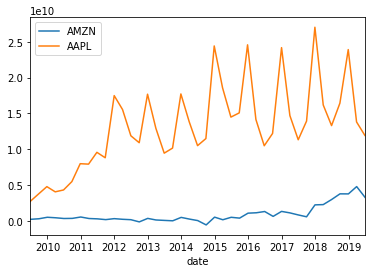

In [29]:
# TODO: perform cleaning operations
df.columns
df[df['symbol'] == 'AMZN'].set_index('date')['ebit'].rename('AMZN').plot(legend=True)
df[df['symbol'] == 'AAPL'].set_index('date')['ebit'].rename('AAPL').plot(legend=True)

Now that we have loaded the relevant Stock Statements, lets load the historical stock data (daily resolution) - in this case loading from file (requires that the `data/download_stocks.sh` script has been executed.

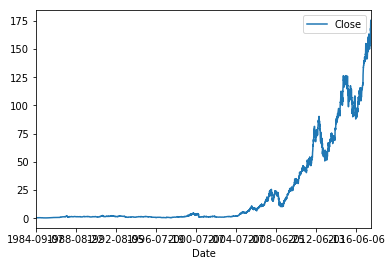

In [19]:
import glob
import os
def list_stocks(type='stock'):
    '''Generates a list of available historic stock data.'''
    fldr = 'Stocks' if type == 'stock' else 'ETFs'
    path = '../data/{}'.format(fldr)
    # list all fiels in direcotry
    files = glob.glob(os.path.join(path, '*.txt'))
    names = pd.Series(files).apply(lambda f: os.path.basename(f).split('.')[0])
    #return pd.DataFrame({'symbol': names, 'file': files})
    return dict(zip(names, files))

def load_stock_file(file, type='stock'):
    # list all fiels in direcotry
    return pd.read_csv(file)
    
stocks = list_stocks('stock')
#stocks
dfa = pd.read_csv(stocks['aapl'])
dfa.set_index('Date')[['Close']].plot();

In [ ]:
# TODO: select historic news and scrap entire news articles? + Use Embeddings to integrate them

## Feature Extraction

Now that we have the relevant data and information for each stock, lets create a feature pipeline and a baseline classifier for profitability (trained using historic data)